## World Happiness Report Project

In [1]:
#Importing necessary libraries 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
ds=pd.read_csv(r'D:\Files\happiness_score_dataset.csv')
ds

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

This dataset contains information related to World Happiness Report. It contains 158 rows and 12 columns out of which 11 columns are inputs and 1 column is target variable i.e. 'Happiness Score'.  
This dataset contains both numerical and catagorical data. Target variable has countinuous data  thus it represents a Regression Problem.The goal is to predict the happiness score considering all the other factors mentioned in the dataset.

In [3]:
#checking for whitespace characters 
col=ds.columns.tolist() #Storing columns name into list
space=''#Initilizing empty 'space' variable 
for i in col:#Iterating through columns
    
    for a in range(1,11): #Iterating for 10 number of times i.e. it can detect upto 10 number of whitespaces per row
        space+=' ' #Incrementing one white space character per iteration
        
        if not ds.loc[ds[i]==space].empty:#Checking if any row contains white space characters
            print(f'There are white space characters present in {i} Column with length of  {len(space)}  white space characters')#Printing if a column contains white space character along with number of  white space characters present in a single row(Note:It does not print total number of white space characters present in a column)
            
    space=''#Reseting 'space' variable

This dataset does not contain any white space character.

In [4]:
ds.dtypes #Checking data types

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

There are three different types of data present in the dataset which are object, int64 and float64. Majority of the data are float64.

In [5]:
ds.isnull().sum() #Checking null values

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

This dataset does not contains null values.

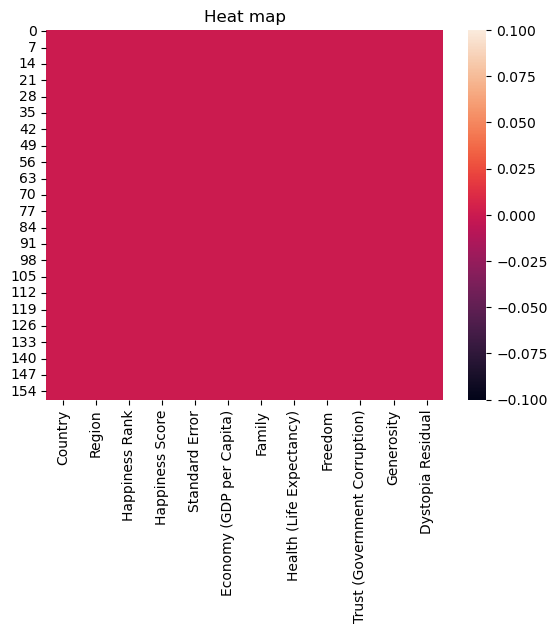

In [6]:
sb.heatmap(ds.isnull()) #Visualizing null values via heatmap
plt.title("Heat map")
plt.show()

This confirms that the number of null values present in this data are none.

In [7]:
#Checking for duplicates vales in dataframe
print(f'Total duplicates values present in DataFrame are {ds.duplicated().sum()}.')

Total duplicates values present in DataFrame are 0.


In [8]:
for i in col:#Iterating c_list variable
    print('\n',i,':-\nUnique values:',ds[i].unique(),'\nNumber of unique values:',ds[i].nunique(),'\n\n',ds[i].value_counts().to_frame('Value Counts'))#Printing    


 Country :-
Unique values: ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 

This gives a breif information about unique values, count of unique values and value counts of each column present in the dataset.   
The 82nd rank has appeared twice in the Happiness Rank feature, resulting in a tie between two countries.  
All data in Country ,Economy ,Freedom,Generosity,Dystopia Residual and Family features are unique.  
Almost all values are unique values in target variable. 

In [9]:
ds.iloc[81:85,:4]

Country                           Region  Happiness Rank  \
81      Jordan  Middle East and Northern Africa              82   
82  Montenegro       Central and Eastern Europe              82   
83       China                     Eastern Asia              84   
84      Zambia               Sub-Saharan Africa              85   

    Happiness Score  
81            5.192  
82            5.192  
83            5.140  
84            5.129

Jordan and Montenegro, these are the countries which resuled in a tie.

In [10]:
ds.info() #Checking more information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

This shows information related to the columns and about their Non-null count and Dtype. It also shows the memory usage , which is 14.9+KB in this case. 

In [11]:
ds.describe()#Checking statistical information 

Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%                    0.910245    1.029510                  0.696705   
75%                    1.158448    1.214405                  0.811013   
max                    1.690420    1.402230                  1.025250   

          Freedom  Trust (Government Corruption)  Generosity  \
count  158.000000                     158.000000  158.000000   
mean     0.428615                       0.143422    0.237296   
std      0.150693                       0.120034    0.126685   
min      0.000000                       0.000000    0.000000   
25%      0.328330                       0.061675    0.150553   
50%      0.435515                       0.107220    0.216130   
75%      0.549092                       0.180255    0.309883   
max      0.669730                       0.551910    0.795880   

       Dystopia Residual  
count         158.000000  
mean            2.098977  
std             0.553550  
min             0.328580  
25%             1.759410  
50%             2.095415  
75%             2.462415  
max             3.602140

This gives the statistical information of the numerical columns. From the above description we can observe the following:   
1)All the columns have same count thus there are no missing values.  
2)Mean is greater than 50% in Standard Error,Trust (Government Corruption) and Generosity features which means the data is skewed to the right in these features.  
3)Mean is less than 50% in Family and Health (Life Expectancy), means that the data is skewed to the left in these features.  
4)There is a huge jump between 75% and max in Happiness Rank, hence, there might be outliers present in this feature.

In [12]:
ds.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

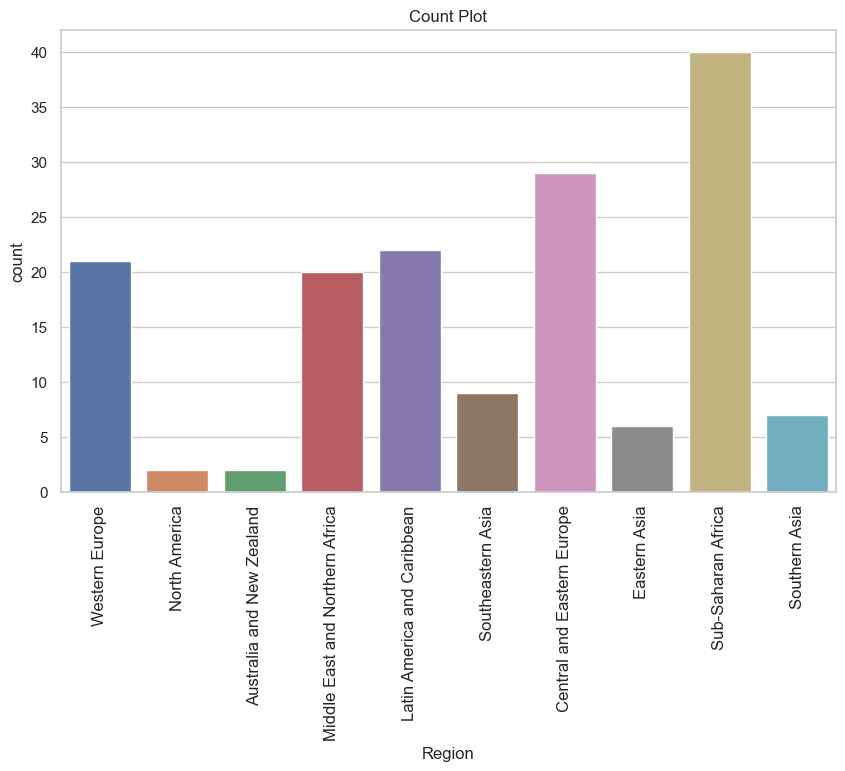

In [13]:
#Visualizing Region via Count Plot
plt.figure(figsize=(10,6))
sb.set_theme(style="whitegrid")
sb.countplot(data=ds,x='Region')
plt.title("Count Plot")
plt.xticks(rotation=90, fontsize=12)
plt.show()

Sun-Saharan Africa feature has the most count, then Central and Eastern Europe feature  and at last Latin America and Caribbean feature.  

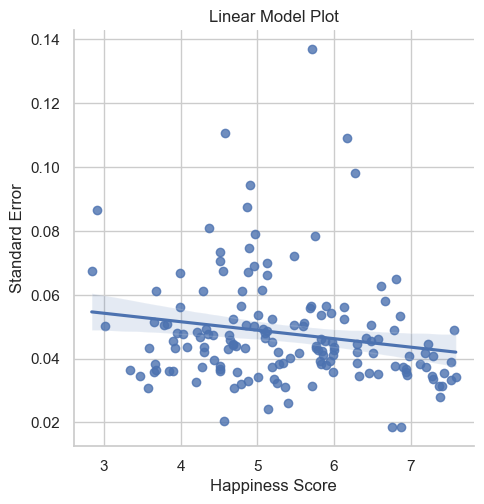

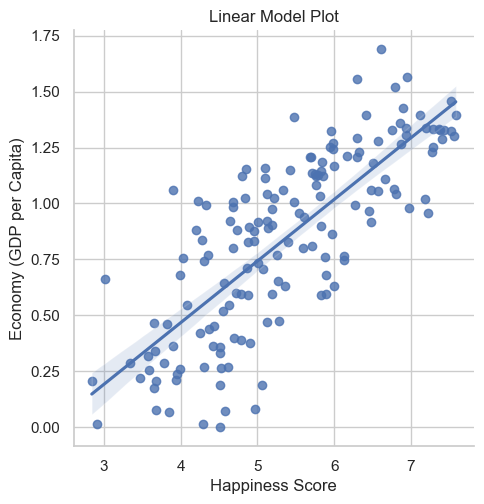

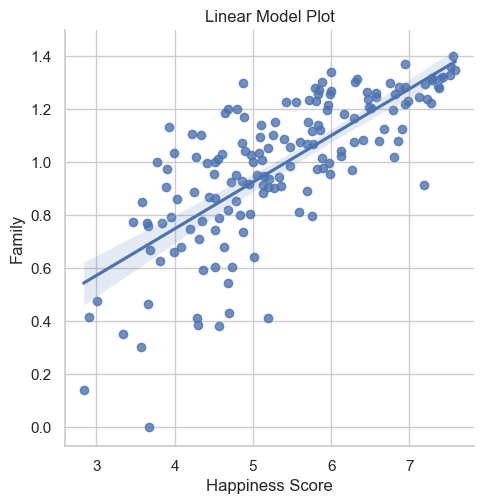

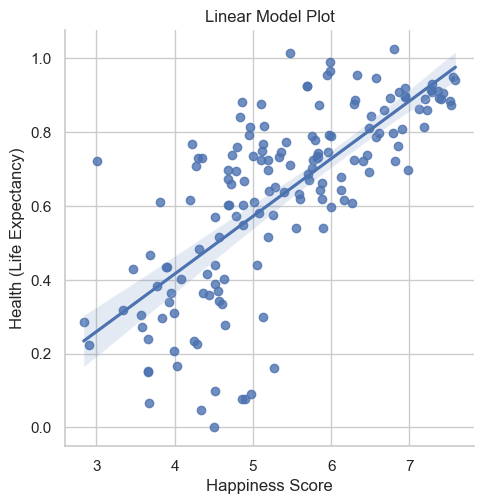

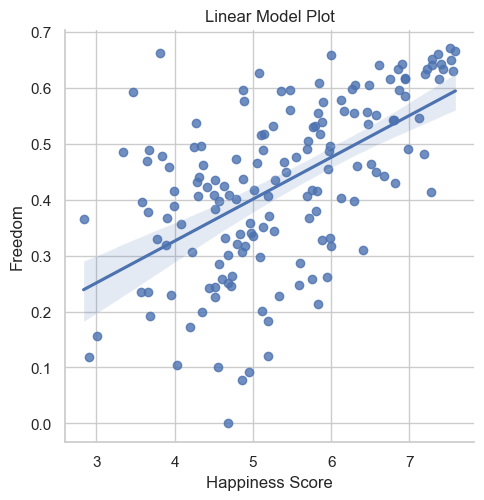

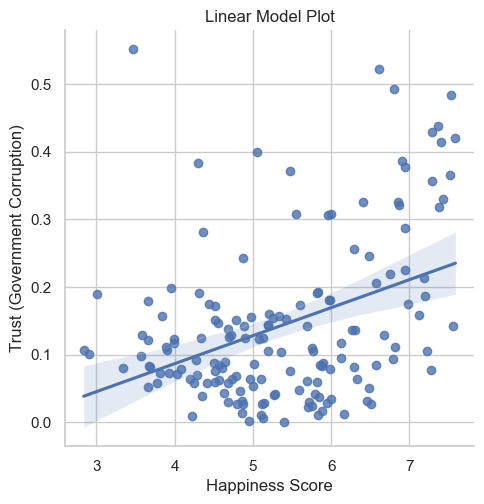

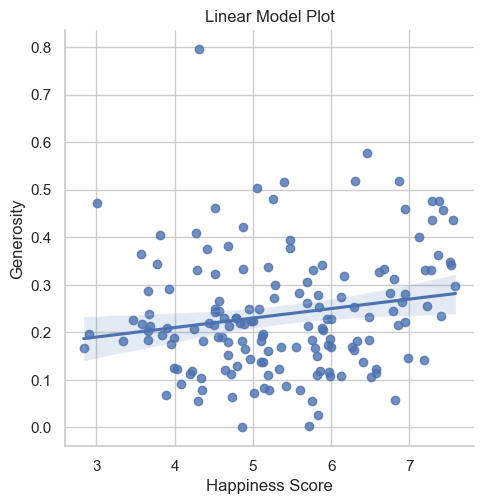

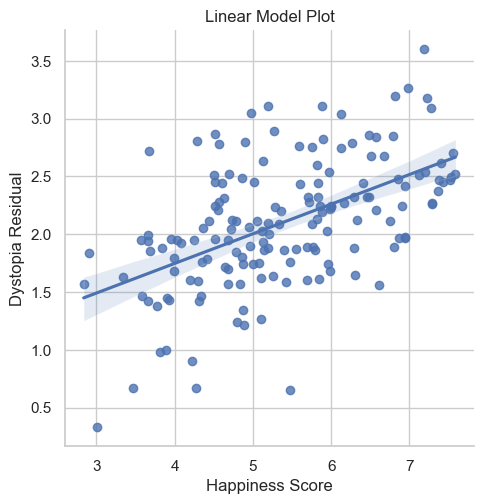

In [14]:
#Checking Happiness Score feature's  relation with other features
for i in col[3:]:
        if i not in ['Happiness Score']:
            sb.lmplot(data=ds,x='Happiness Score',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Happiness Score have low negative linear relation with Standard Error feature.  
Happiness Score have high positive linear relation with Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity and Dystopia Residual features. 

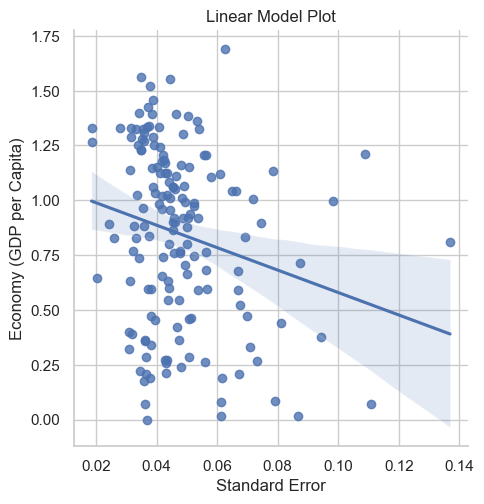

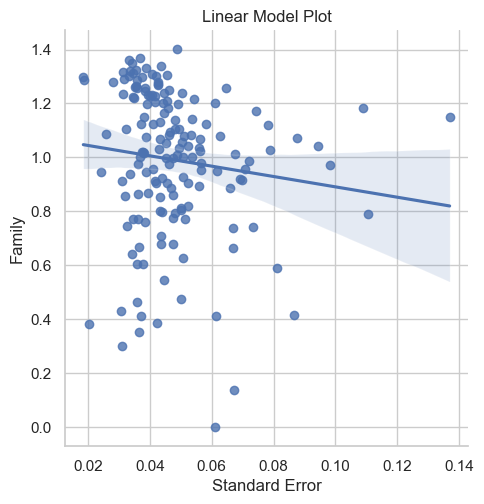

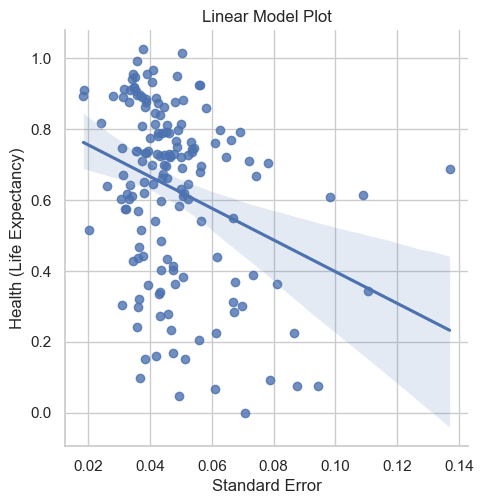

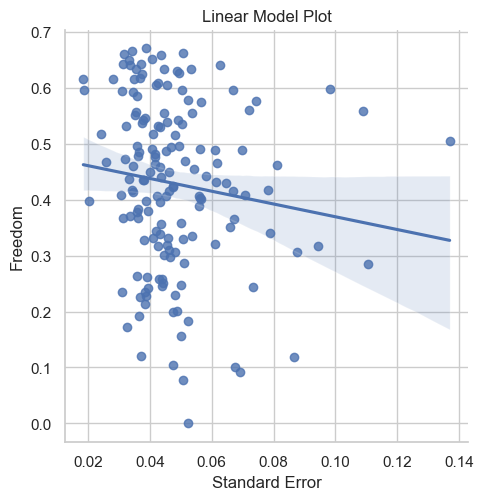

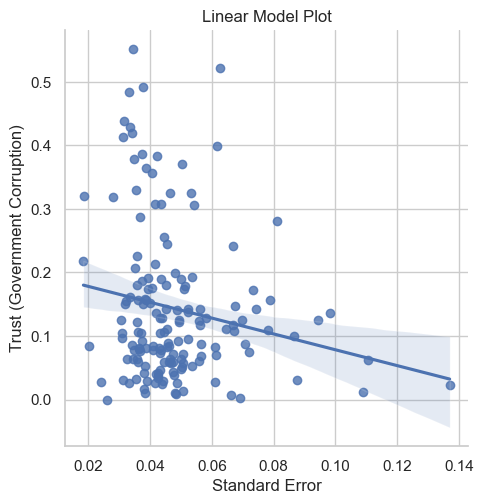

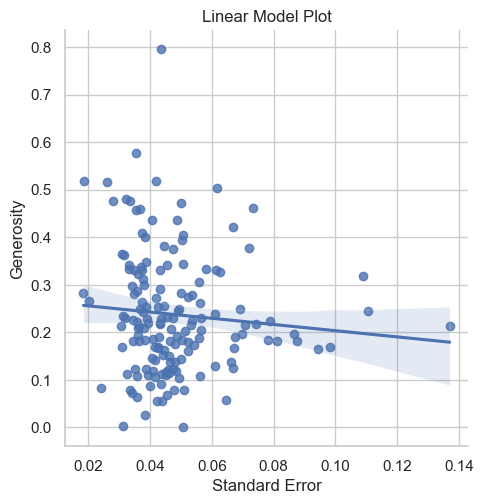

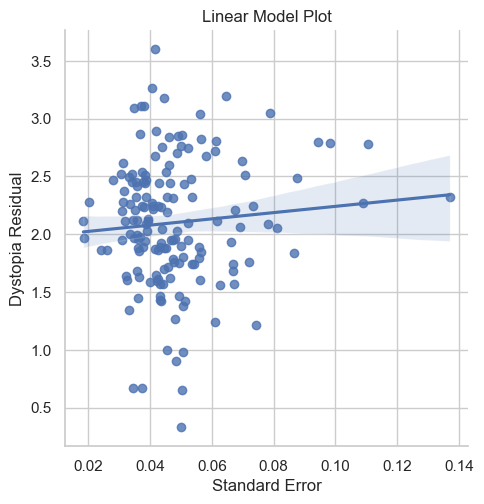

In [15]:
#Checking Standard Error feature's  relation with other features
for i in col[3:]:
        if i not in ['Happiness Score','Standard Error']:
            sb.lmplot(data=ds,x='Standard Error',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Standard Error have high negative linear relation with Economy (GDP per Capita),Health (Life Expectancy) and Trust (Government Corruption) features, and low negative linear relation with Family,Freedom and Generosity features.  
Standard Error have low positive linear relation with Dystopia Residual feature.

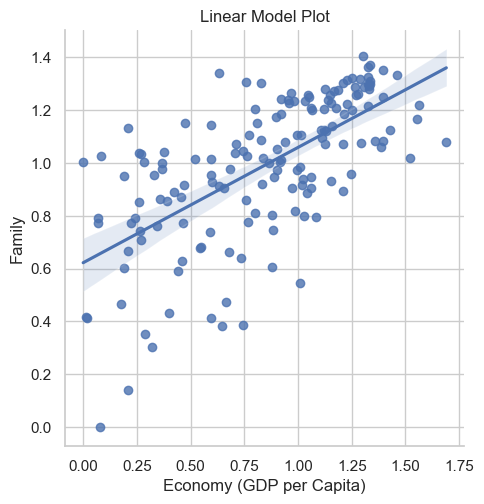

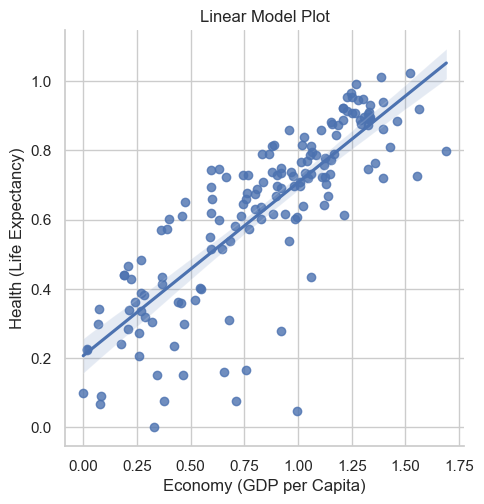

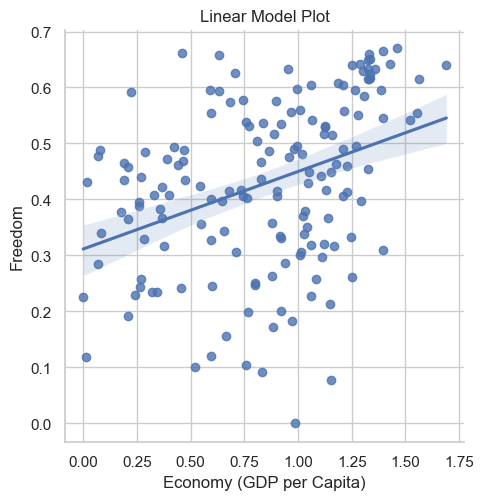

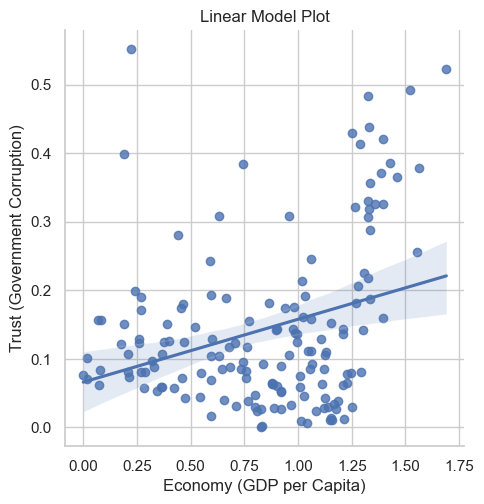

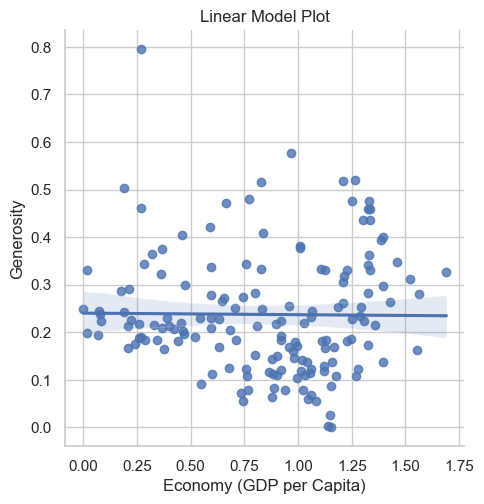

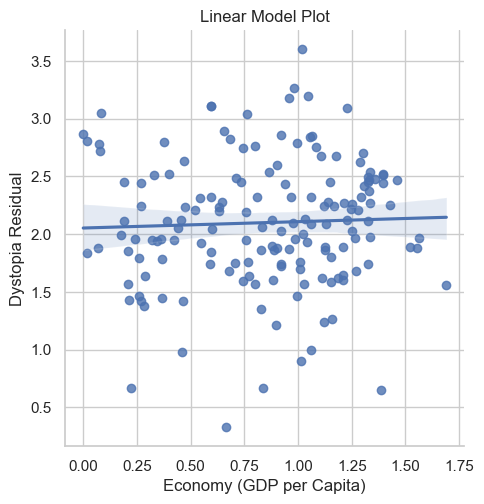

In [16]:
#Checking Economy (GDP per Capita) feature's  relation with other features
for i in col[3:]:
        if i not in ['Happiness Score','Standard Error','Economy (GDP per Capita)']:
            sb.lmplot(data=ds,x='Economy (GDP per Capita)',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Economy (GDP per Capita) have high positive linear relation with Family,Health (Life Expectancy),Freedom and Trust (Government Corruption) features, and low postive linear relation with Dystopia Residual feature.  
Economy (GDP per Capita) have almost no linear relation with Generosity feature.  

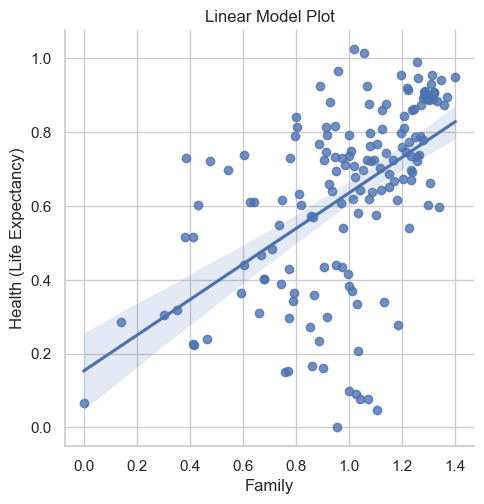

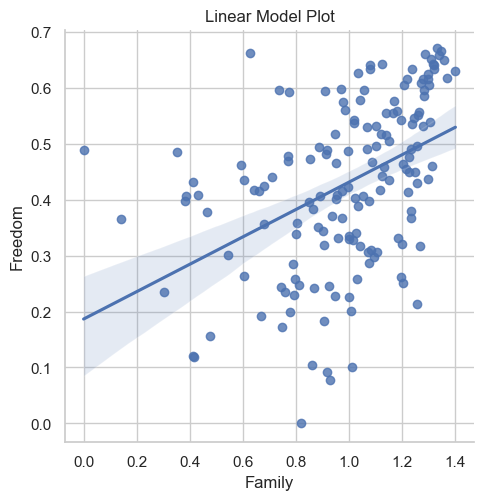

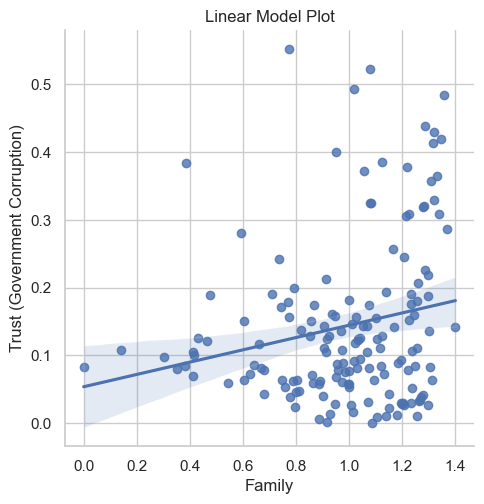

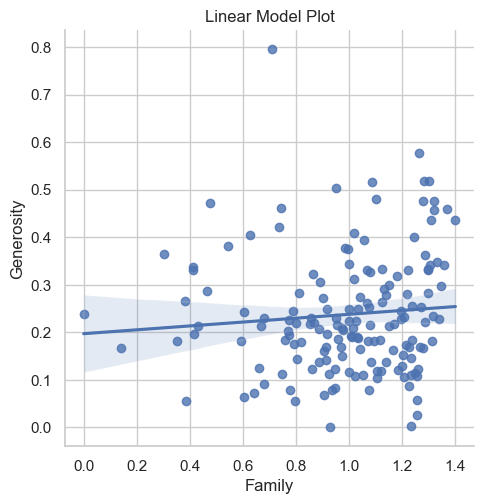

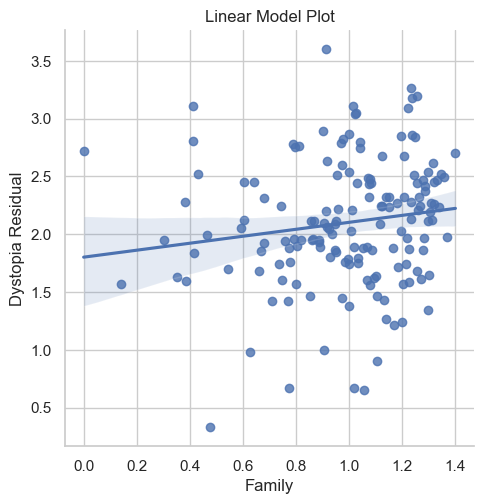

In [17]:
#Checking Family feature's  relation with other features 
for i in col[3:]:
        if i not in ['Happiness Score','Standard Error','Economy (GDP per Capita)','Family']:
            sb.lmplot(data=ds,x='Family',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Family have high positive linear relation with Health (Life Expectancy) and Freedom features,and low postive linear relation with Trust (Government Corruption),Dystopia Residual and Generosity features 

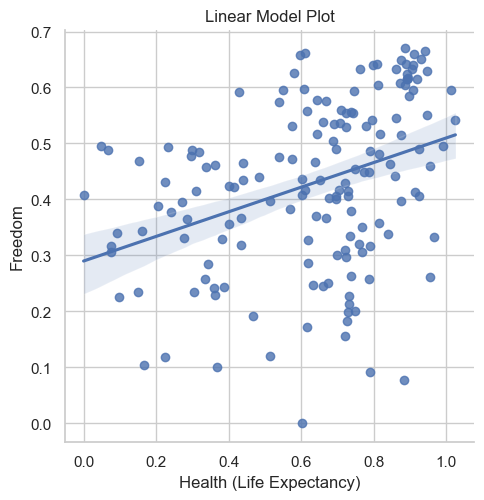

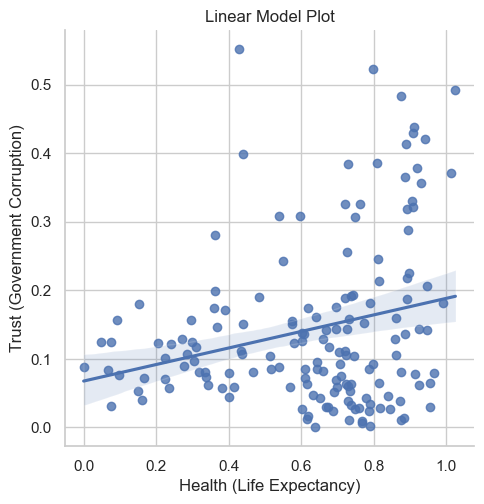

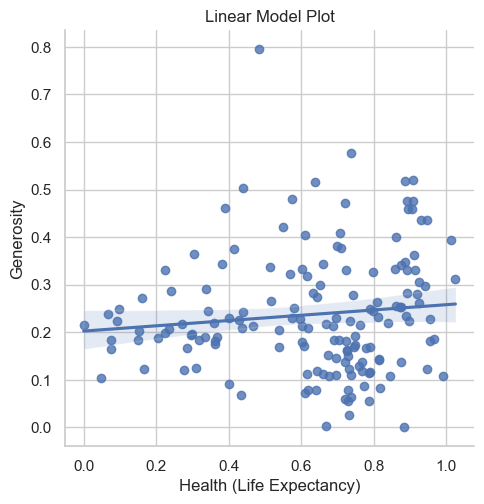

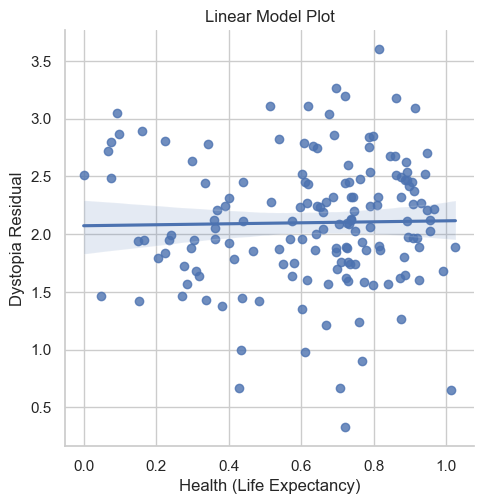

In [18]:
#Checking Health (Life Expectancy) feature's  relation with other features
for i in col[3:]:
        if i not in ['Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)']:
            sb.lmplot(data=ds,x='Health (Life Expectancy)',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Health (Life Expectancy) have high postive linear relation with Freedom feature, and low postive linear relation with Trust (Government Corruption),and Generosity features.  
Health (Life Expectancy) have almost no linear relation with Dystopia Residual feature . 

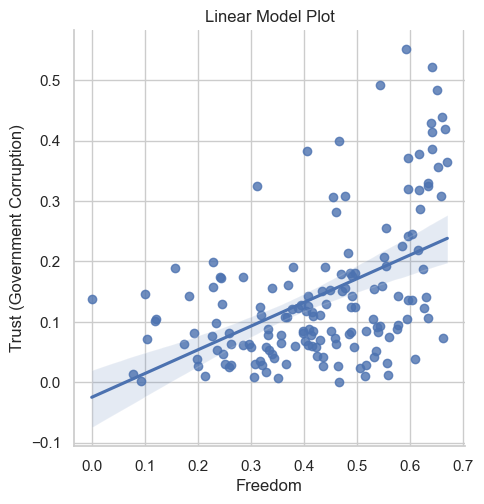

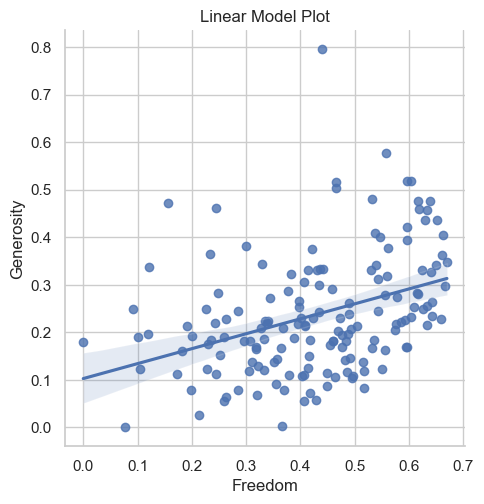

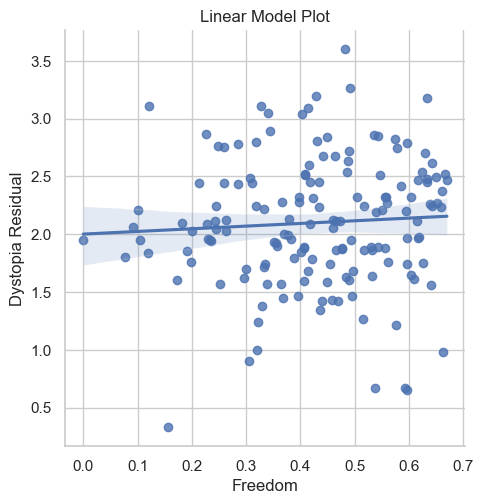

In [19]:
#Checking Freedom feature's  relation with other features
for i in col[3:]:
        if i not in ['Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom']:
            sb.lmplot(data=ds,x='Freedom',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Freedom have high postive linear relation with Trust (Government Corruption) and Generosity features, and low postive linear relation with Dystopia Residual feature. 

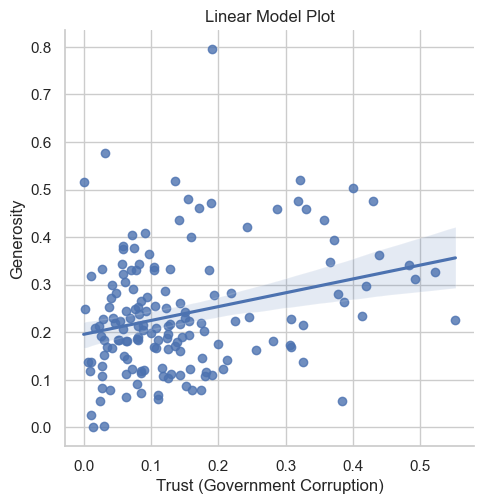

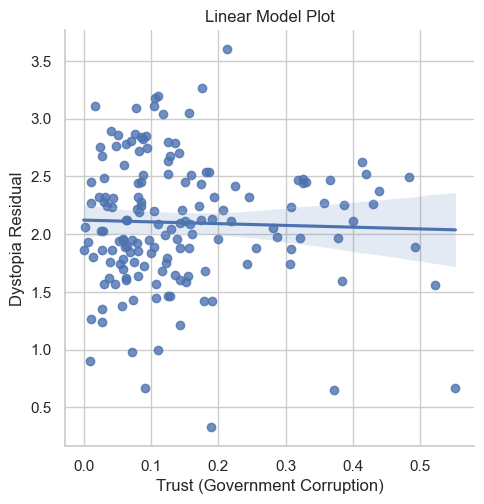

In [20]:
#Checking Trust (Government Corruption) feature's  relation with other features 
for i in col[3:]:
        if i not in ['Trust (Government Corruption)','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom']:
            sb.lmplot(data=ds,x='Trust (Government Corruption)',y=i)
            plt.title("Linear Model Plot")
            plt.show()

Trust (Government Corruption) have low positive linear relation with Generosity feature.  
Trust (Government Corruption) have low neagative linear relation with Dystopia Residual feature.  

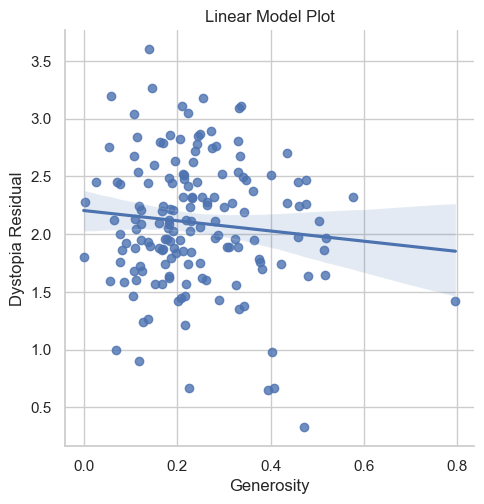

In [21]:
#Checking linear relation between  Generosity and Dystopia Residual features.
sb.lmplot(data=ds,x='Generosity',y='Dystopia Residual')
plt.title("Linear Model Plot")
plt.show()

Generosity and Dystopia Residual features have low negative linear relation with each other.

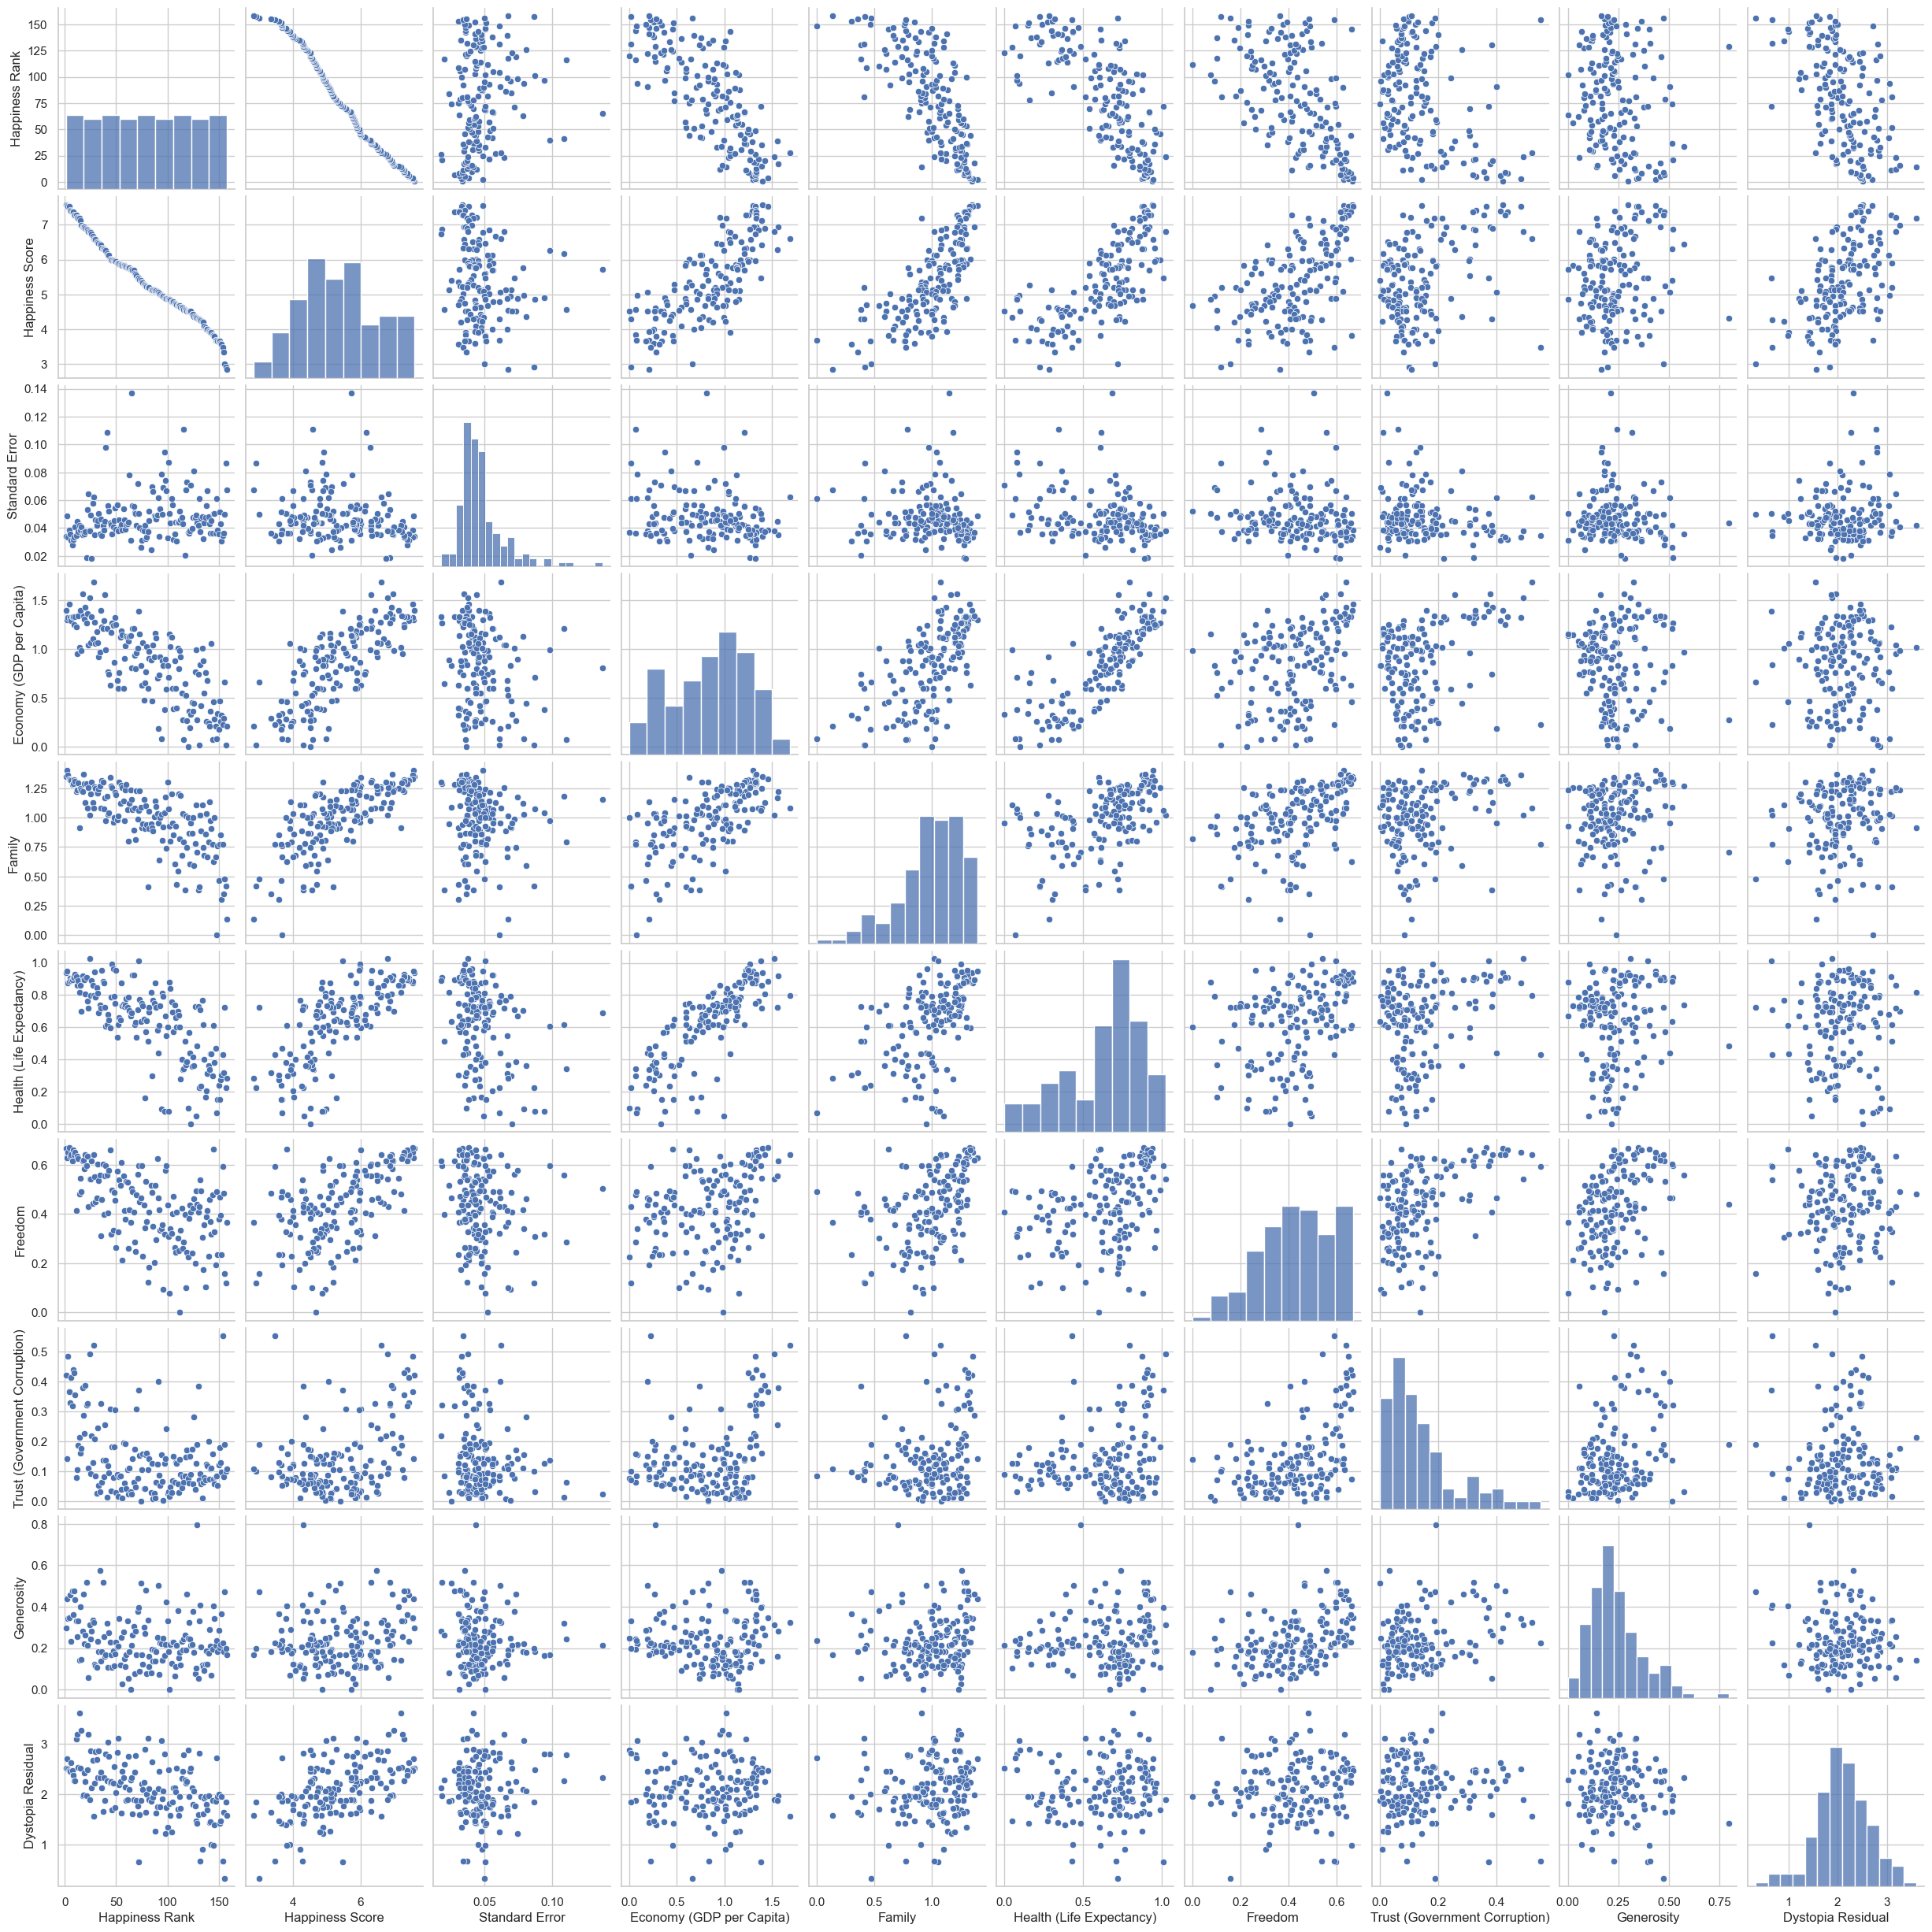

In [22]:
#Visualizing relation between features with multiple plots via Pair plot 
sb.pairplot(data=ds)
plt.show()

This gives pairwise relation ship between the features along with their distribution in the diagonals.

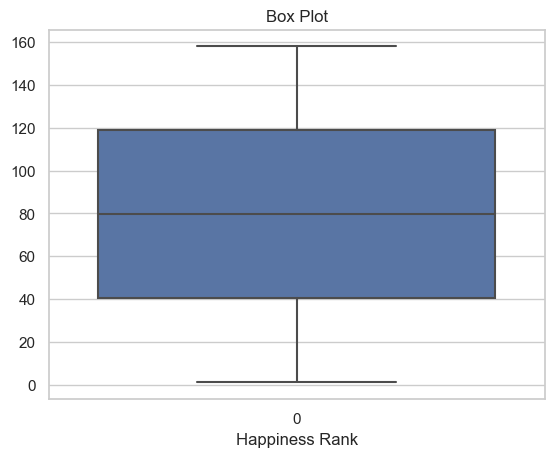

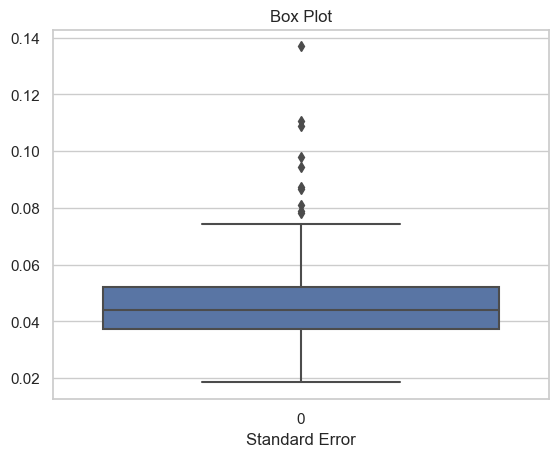

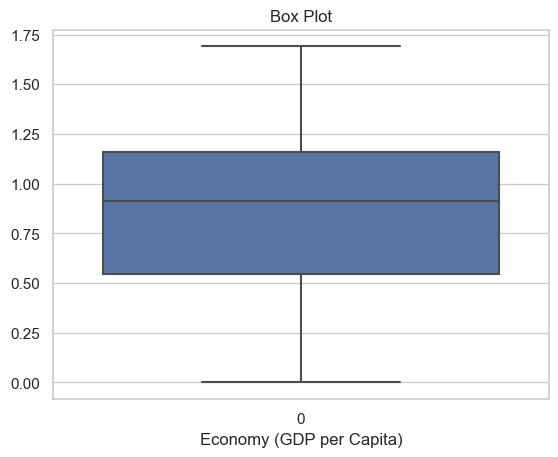

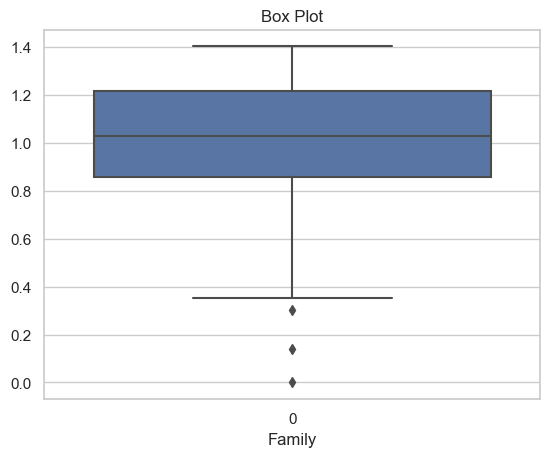

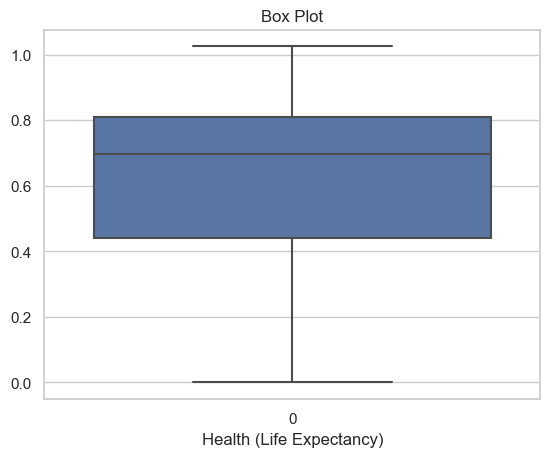

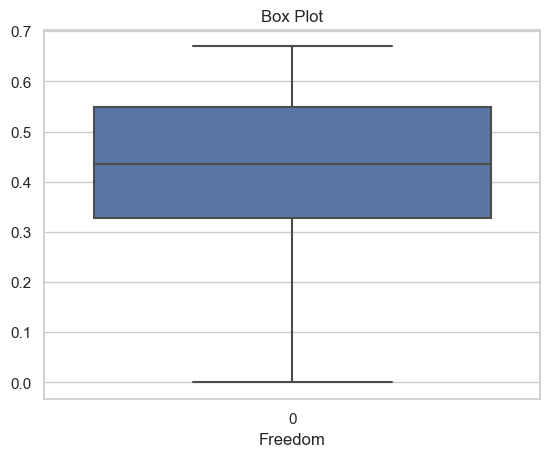

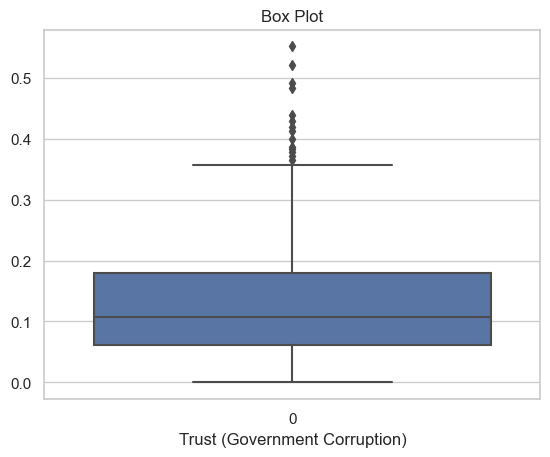

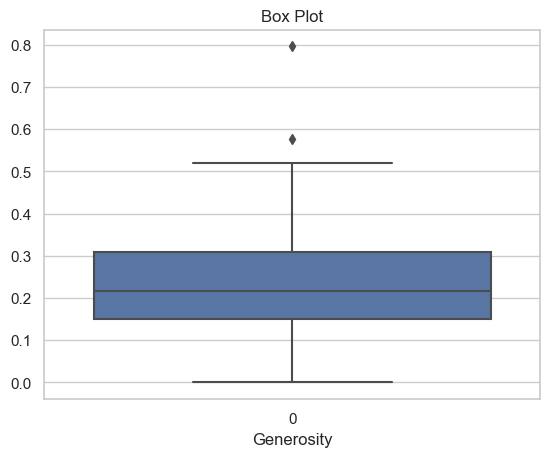

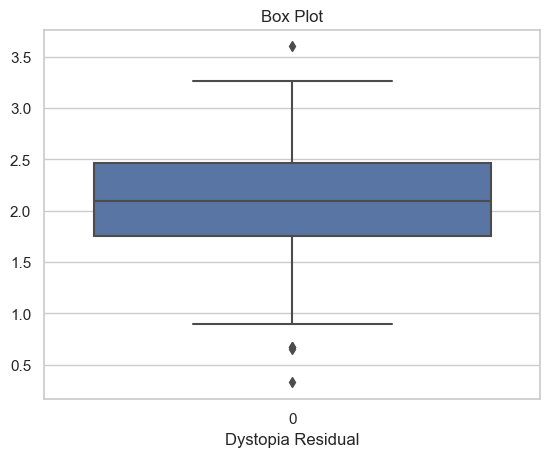

In [23]:
#Checking outliers
a=['Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']#Creating list
for i in a:
    sb.boxplot(ds[i])
    plt.xlabel(i)
    plt.title('Box Plot')
    plt.show()

Standard error,Family,Trust (Government Corruption),Generosity and Dystopia Residual features have outliers present in them.

In [24]:
#removing outliers using zscore
#Importing necessary libraries
from scipy.stats import zscore as zs
import numpy as np
f_outlier=ds[a]
z=np.abs(zs(f_outlier))
z

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0          1.721000        0.805926                  1.369621  1.320281   
1          1.699075        0.055889                  1.135226  1.514458   
2          1.677149        0.854487                  1.192861  1.361054   
3          1.655224        0.531526                  1.525130  1.251922   
4          1.633299        0.722845                  1.194876  1.221204   
..              ...             ...                       ...       ...   
153        1.633576        0.774917                  1.552987  0.800520   
154        1.655501        0.662582                  1.392303  2.346860   
155        1.677427        0.132534                  0.455245  1.901086   
156        1.699352        2.263962                  2.067566  2.118467   
157        1.721277        1.134182                  1.586334  3.134725   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                    1.263408  1.577438                       2.309652   
1                    1.289434  1.332456                       0.016480   
2                    0.992229  1.469659                       2.842774   
3                    1.035145  1.605131                       1.852081   
4                    1.118054  1.360416                       1.555725   
..                        ...       ...                            ...   
153                  0.818610  1.087740                       3.413922   
154                  1.263362  0.372033                       0.529210   
155                  0.372199  1.809238                       0.381419   
156                  1.649648  2.064472                       0.357715   
157                  1.404129  0.426621                       0.301803   

     Generosity  Dystopia Residual  
0      0.471040           0.758258  
1      1.575856           1.092857  
2      0.824293           0.712335  
3      0.868638           0.663893  
4      1.748563           0.639337  
..          ...                ...  
153    0.087228           2.588925  
154    0.433117           0.843967  
155    1.856891           3.208430  
156    0.316950           0.481985  
157    0.558153           0.963612  

[158 rows x 9 columns]

The variables z holds the zscores values of these features.

In [25]:
np.where(z>3)

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64),
 array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))

These are the index of  ouliers present in the features.

In [26]:
z.iloc[27,6]

3.1646194851713774

In [27]:
z.iloc[40,1]

3.5727739331415806

In [28]:
z.iloc[155,8]

3.2084304855119403

We have confirmed that these values holds outliers as per the threshold value.

In [29]:
#Removing outliers
zscore=ds[(z<3).all(axis=1)]

In [30]:
#Using IQR method to verify that can it remove outliers with less data loss than zscore method?
q1=f_outlier.quantile(.25)
q3=f_outlier.quantile(.75)
iqr=q3-q1
IQR=ds[~((ds< (q1-1.5*iqr)) | (ds>(q3+1.5*iqr))).any(axis=1)]

In [31]:
print('Data loss percentage after removing outliers via zscore',((ds.shape[0]-zscore.shape[0])/ds.shape[0])*100)
print('Data loss percentage after removing outliers via IQR',((ds.shape[0]-IQR.shape[0])/ds.shape[0])*100)

Data loss percentage after removing outliers via zscore 5.69620253164557
Data loss percentage after removing outliers via IQR 20.253164556962027


We can observe that zscore method performed well here, hence, we will update the dataframe with zscore method.

In [32]:
outliers=ds.shape[0]-zscore.shape[0]
print(f'Outliers removed : {outliers}')

Outliers removed : 9


In [33]:
ds=zscore#Updating dataframe

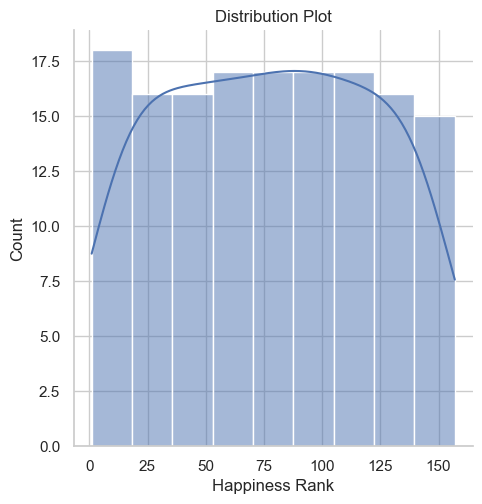

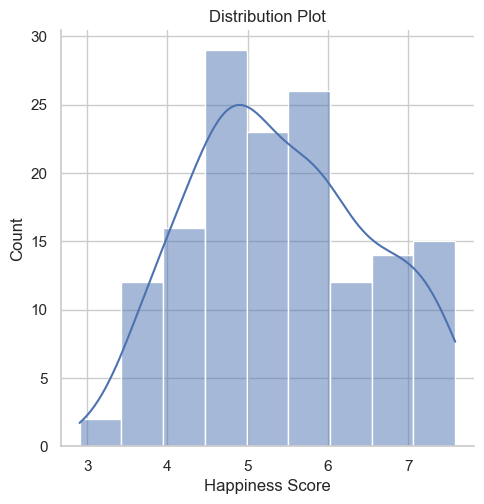

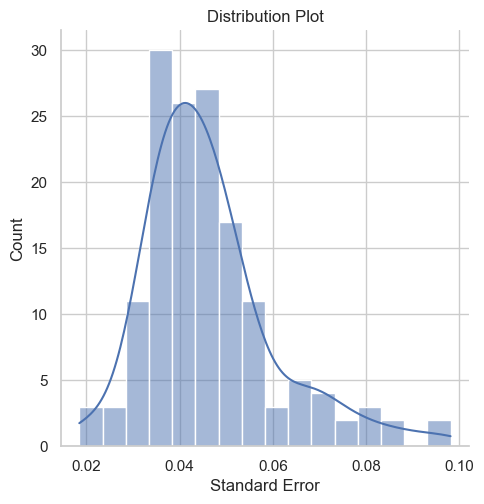

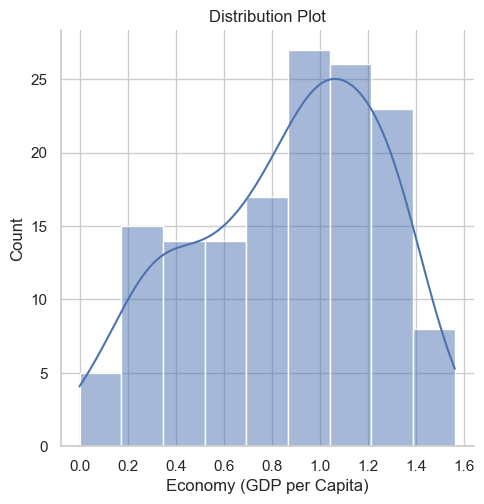

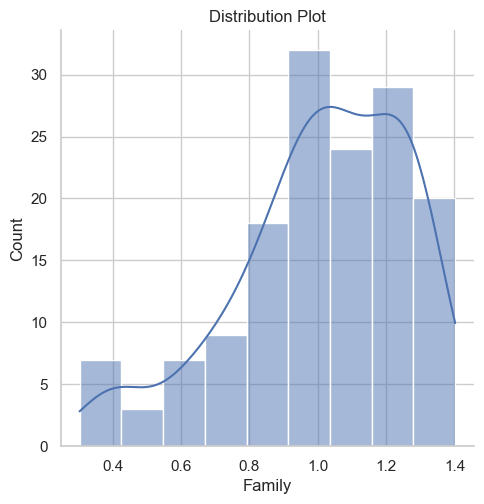

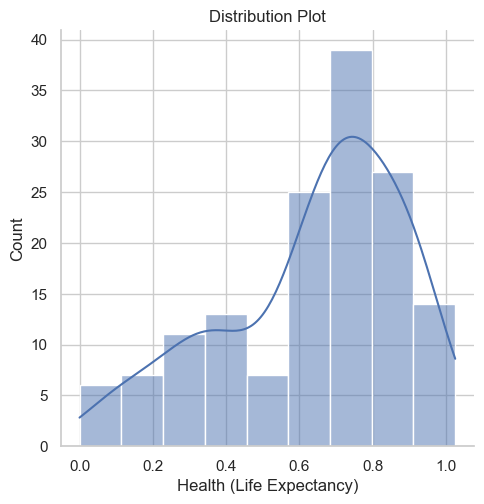

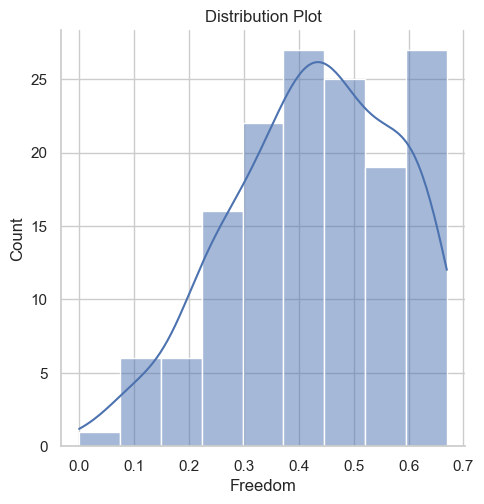

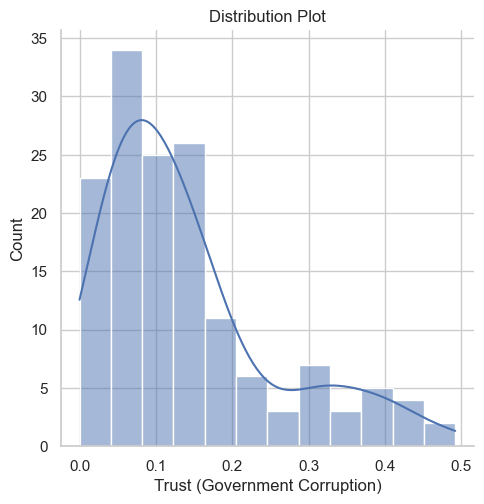

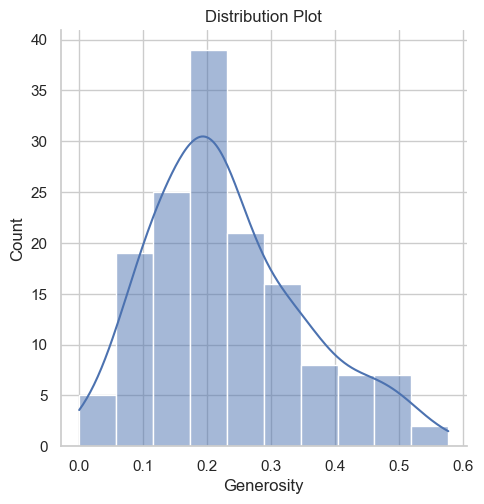

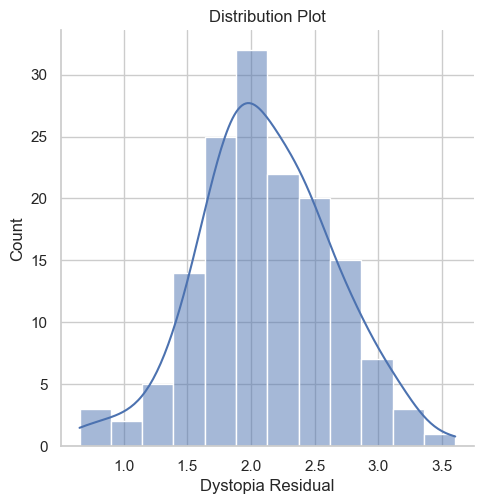

In [34]:
#checking distribution of continous features 
for i in col[2:]:
    sb.displot(ds[i],kde=True)
    plt.title('Distribution Plot')    

Standard Error,Trust(Government Corruption) and Generosity   are skewed to the right.  
Family and Health (Life Expectancy) features  are skewed to the left.  
The rest of features have almost normal distribution.

In [35]:
ds.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

Standard Error,Trust (Government Corruption), Generosity, Family and Health features do not fall under the acceptable range thus we can use yeojohnson  method to remove the skewness.

In [36]:
from scipy.stats import yeojohnson as yj
ds['Standard Error'],lambda_v=yj(ds["Standard Error"])
ds['Trust (Government Corruption)'],lambda_v=yj(ds['Trust (Government Corruption)'])
ds["Generosity"],lambda_v=yj(ds['Generosity'])
ds['Family'],lambda_v=yj(ds['Family'])
ds['Health (Life Expectancy)'],lambda_v=yj(ds['Health (Life Expectancy)'])
ds.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                  -0.031216
Economy (GDP per Capita)        -0.390657
Family                          -0.148528
Health (Life Expectancy)        -0.190663
Freedom                         -0.400867
Trust (Government Corruption)    0.174593
Generosity                       0.025172
Dystopia Residual               -0.021144
dtype: float64

Skewness is removed from the features.

In [37]:
#Encoding categorical columns using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds

Country              Region  Happiness Rank  Happiness Score  \
0     Switzerland      Western Europe               1            7.587   
1         Iceland      Western Europe               2            7.561   
2         Denmark      Western Europe               3            7.527   
3          Norway      Western Europe               4            7.522   
4          Canada       North America               5            7.427   
..            ...                 ...             ...              ...   
150   Ivory Coast  Sub-Saharan Africa             151            3.655   
151  Burkina Faso  Sub-Saharan Africa             152            3.587   
152   Afghanistan       Southern Asia             153            3.575   
154         Benin  Sub-Saharan Africa             155            3.340   
156       Burundi  Sub-Saharan Africa             157            2.905   

     Standard Error  Economy (GDP per Capita)    Family  \
0          0.022404                   1.39651  5.563267   
1          0.027366                   1.30232  6.042358   
2          0.022064                   1.32548  5.661624   
3          0.024194                   1.45900  5.400993   
4          0.022969                   1.32629  5.329139   
..              ...                       ...       ...   
150        0.028055                   0.46534  1.861697   
151        0.025698                   0.25812  2.229169   
152        0.021021                   0.31982  0.438842   
154        0.023366                   0.28665  0.544094   
156        0.034088                   0.01530  0.686398   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    2.318521  0.66557                       0.153634   
1                    2.346570  0.62877                       0.093490   
2                    2.038287  0.64938                       0.159122   
3                    2.081193  0.66973                       0.147439   
4                    2.165608  0.63297                       0.142463   
..                        ...      ...                            ...   
150                  0.179031  0.46866                       0.107692   
151                  0.362031  0.39493                       0.087786   
152                  0.418261  0.23414                       0.072369   
154                  0.446999  0.48450                       0.062601   
156                  0.284749  0.11850                       0.074211   

     Generosity  Dystopia Residual  
0      0.207111            2.51738  
1      0.265247            2.70201  
2      0.227561            2.49204  
3      0.229994            2.46531  
4      0.272943            2.45176  
..          ...                ...  
150    0.156166            1.41723  
151    0.165421            1.46494  
152    0.237670            1.95210  
154    0.144556            1.63328  
156    0.153543            1.83302  

[149 rows x 12 columns]

In [38]:
ds['Country']=le.fit_transform(ds['Country'])#Transforming Country feature
ds.insert(1,'Encoded Region',le.fit_transform(ds['Region']))#Creating new column with transformed Region feature
ds

Country  Encoded Region              Region  Happiness Rank  \
0        129               9      Western Europe               1   
1         57               9      Western Europe               2   
2         36               9      Western Europe               3   
3        101               9      Western Europe               4   
4         24               5       North America               5   
..       ...             ...                 ...             ...   
150       65               8  Sub-Saharan Africa             151   
151       20               8  Sub-Saharan Africa             152   
152        0               7       Southern Asia             153   
154       13               8  Sub-Saharan Africa             155   
156       21               8  Sub-Saharan Africa             157   

     Happiness Score  Standard Error  Economy (GDP per Capita)    Family  \
0              7.587        0.022404                   1.39651  5.563267   
1              7.561        0.027366                   1.30232  6.042358   
2              7.527        0.022064                   1.32548  5.661624   
3              7.522        0.024194                   1.45900  5.400993   
4              7.427        0.022969                   1.32629  5.329139   
..               ...             ...                       ...       ...   
150            3.655        0.028055                   0.46534  1.861697   
151            3.587        0.025698                   0.25812  2.229169   
152            3.575        0.021021                   0.31982  0.438842   
154            3.340        0.023366                   0.28665  0.544094   
156            2.905        0.034088                   0.01530  0.686398   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                    2.318521  0.66557                       0.153634   
1                    2.346570  0.62877                       0.093490   
2                    2.038287  0.64938                       0.159122   
3                    2.081193  0.66973                       0.147439   
4                    2.165608  0.63297                       0.142463   
..                        ...      ...                            ...   
150                  0.179031  0.46866                       0.107692   
151                  0.362031  0.39493                       0.087786   
152                  0.418261  0.23414                       0.072369   
154                  0.446999  0.48450                       0.062601   
156                  0.284749  0.11850                       0.074211   

     Generosity  Dystopia Residual  
0      0.207111            2.51738  
1      0.265247            2.70201  
2      0.227561            2.49204  
3      0.229994            2.46531  
4      0.272943            2.45176  
..          ...                ...  
150    0.156166            1.41723  
151    0.165421            1.46494  
152    0.237670            1.95210  
154    0.144556            1.63328  
156    0.153543            1.83302  

[149 rows x 13 columns]

In [39]:
compare=ds.drop_duplicates(subset='Region')#selecting rows in dataframe on basis of unique data  present in Region feature
compare[['Encoded Region','Region']]

Encoded Region                           Region
0                9                   Western Europe
4                5                    North America
8                0        Australia and New Zealand
10               4  Middle East and Northern Africa
11               3      Latin America and Caribbean
23               6                Southeastern Asia
30               1       Central and Eastern Europe
37               2                     Eastern Asia
70               8               Sub-Saharan Africa
78               7                    Southern Asia

This provides us mapping of  encoded value to their corresponding original value.

In [40]:
#Updating DataFrame
ds.drop('Region',axis=1,inplace=True)
ds.rename(columns={'Encoded Region': 'Region'}, inplace=True)
ds

Country  Region  Happiness Rank  Happiness Score  Standard Error  \
0        129       9               1            7.587        0.022404   
1         57       9               2            7.561        0.027366   
2         36       9               3            7.527        0.022064   
3        101       9               4            7.522        0.024194   
4         24       5               5            7.427        0.022969   
..       ...     ...             ...              ...             ...   
150       65       8             151            3.655        0.028055   
151       20       8             152            3.587        0.025698   
152        0       7             153            3.575        0.021021   
154       13       8             155            3.340        0.023366   
156       21       8             157            2.905        0.034088   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  5.563267                  2.318521  0.66557   
1                     1.30232  6.042358                  2.346570  0.62877   
2                     1.32548  5.661624                  2.038287  0.64938   
3                     1.45900  5.400993                  2.081193  0.66973   
4                     1.32629  5.329139                  2.165608  0.63297   
..                        ...       ...                       ...      ...   
150                   0.46534  1.861697                  0.179031  0.46866   
151                   0.25812  2.229169                  0.362031  0.39493   
152                   0.31982  0.438842                  0.418261  0.23414   
154                   0.28665  0.544094                  0.446999  0.48450   
156                   0.01530  0.686398                  0.284749  0.11850   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                         0.153634    0.207111            2.51738  
1                         0.093490    0.265247            2.70201  
2                         0.159122    0.227561            2.49204  
3                         0.147439    0.229994            2.46531  
4                         0.142463    0.272943            2.45176  
..                             ...         ...                ...  
150                       0.107692    0.156166            1.41723  
151                       0.087786    0.165421            1.46494  
152                       0.072369    0.237670            1.95210  
154                       0.062601    0.144556            1.63328  
156                       0.074211    0.153543            1.83302  

[149 rows x 12 columns]

Dataframe is updated succesfully.

In [41]:
#Checking correlation between independant and dependant varibales
cor=ds.corr()
cor

Country    Region  Happiness Rank  \
Country                        1.000000  0.009603       -0.125591   
Region                         0.009603  1.000000        0.184520   
Happiness Rank                -0.125591  0.184520        1.000000   
Happiness Score                0.120329 -0.145850       -0.992921   
Standard Error                -0.010191 -0.074226        0.222400   
Economy (GDP per Capita)       0.039897 -0.224928       -0.773651   
Family                         0.174310 -0.098025       -0.750542   
Health (Life Expectancy)       0.032718 -0.258828       -0.759986   
Freedom                        0.091689  0.101335       -0.571089   
Trust (Government Corruption)  0.025297  0.211648       -0.377321   
Generosity                     0.106629  0.320795       -0.206227   
Dystopia Residual              0.048377 -0.059494       -0.526680   

                               Happiness Score  Standard Error  \
Country                               0.120329       -0.010191   
Region                               -0.145850       -0.074226   
Happiness Rank                       -0.992921        0.222400   
Happiness Score                       1.000000       -0.239566   
Standard Error                       -0.239566        1.000000   
Economy (GDP per Capita)              0.773577       -0.234615   
Family                                0.753635       -0.187401   
Health (Life Expectancy)              0.756464       -0.320227   
Freedom                               0.585066       -0.211683   
Trust (Government Corruption)         0.404730       -0.109699   
Generosity                            0.231255       -0.137493   
Dystopia Residual                     0.528334        0.012498   

                               Economy (GDP per Capita)    Family  \
Country                                        0.039897  0.174310   
Region                                        -0.224928 -0.098025   
Happiness Rank                                -0.773651 -0.750542   
Happiness Score                                0.773577  0.753635   
Standard Error                                -0.234615 -0.187401   
Economy (GDP per Capita)                       1.000000  0.644572   
Family                                         0.644572  1.000000   
Health (Life Expectancy)                       0.841707  0.566374   
Freedom                                        0.376780  0.519695   
Trust (Government Corruption)                  0.239674  0.236854   
Generosity                                    -0.015619  0.178888   
Dystopia Residual                              0.026936  0.137864   

                               Health (Life Expectancy)   Freedom  \
Country                                        0.032718  0.091689   
Region                                        -0.258828  0.101335   
Happiness Rank                                -0.759986 -0.571089   
Happiness Score                                0.756464  0.585066   
Standard Error                                -0.320227 -0.211683   
Economy (GDP per Capita)                       0.841707  0.376780   
Family                                         0.566374  0.519695   
Health (Life Expectancy)                       1.000000  0.404945   
Freedom                                        0.404945  1.000000   
Trust (Government Corruption)                  0.199159  0.487711   
Generosity                                     0.120640  0.430167   
Dystopia Residual                              0.042297  0.058596   

                               Trust (Government Corruption)  Generosity  \
Country                                             0.025297    0.106629   
Region                                              0.211648    0.320795   
Happiness Rank                                     -0.377321   -0.206227   
Happiness Score                                     0.404730    0.231255   
Standard Error                                     -0.109699   -0.137493   
Economy (GDP per Capita

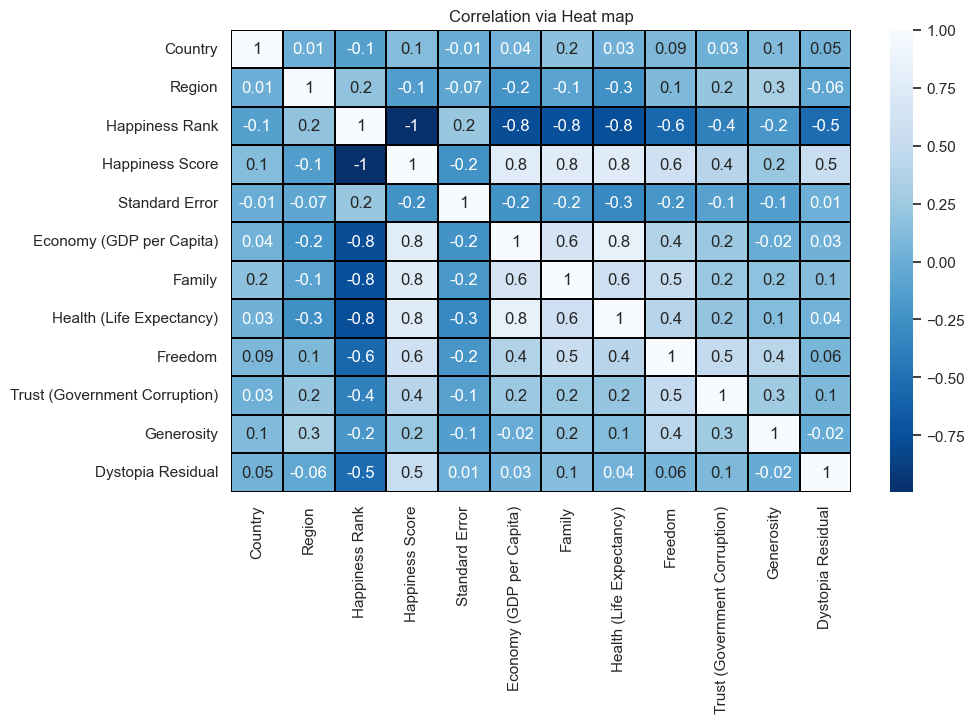

In [42]:
#Visualizing correlation
plt.figure(figsize=(10,6))
sb.heatmap(cor,annot=True,cmap="Blues_r",linecolor='black',linewidths=0.1,fmt='0.1g')
plt.title('Correlation via Heat map')
plt.show()

We can observe the following from this heatmap:  
1)Health (Life Expectancy),Family and Economy (GDP per Capita) features have high positive correlation with target variable.  
2)Freedom,Trust (Government Corruption) and Dystopia Residual features have moderate positive correlation with target variable.  
3)Country and Generosity features have low positive correlation with target variable.  
4)Standard Error and Region features have low negative correlation with target variable.  
5)Happiness Rank feature have high negative correlation with target variable.  
6)Economy (GDP per Capita),Family and Health (Life Expectancy) features are highly negative correlated with Happiness Rank feature.  
7)Economy (GDP per Capita) and Health (Life Expectancy) features are highly positive correlated with each other.  

In [43]:
#Separating features and target variable 
x=ds.drop('Happiness Score',axis=1)
y=ds['Happiness Score']

In [44]:
#checking dimensions of features and label 
print('Dimensions of features:',x.shape[0],'\nDimensions of label:',y.shape[0])

Dimensions of features: 149 
Dimensions of label: 149


We can observe that both features and lable have same number of dimensions.

In [45]:
#Importing required library to apply StandardScaler
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x

Country    Region  Happiness Rank  Standard Error  \
0    1.278724  1.296837       -1.713905       -0.950337   
1   -0.395242  1.296837       -1.691535        0.378562   
2   -0.883482  1.296837       -1.669166       -1.041401   
3    0.627737  1.296837       -1.646796       -0.471124   
4   -1.162476 -0.026647       -1.624427       -0.799032   
..        ...       ...             ...             ...   
144 -0.209246  0.965966        1.641542        0.563000   
145 -1.255474  0.965966        1.663911       -0.068119   
146 -1.720465  0.635095        1.686281       -1.320810   
147 -1.418221  0.965966        1.731020       -0.692726   
148 -1.232225  0.965966        1.775759        2.178766   

     Economy (GDP per Capita)    Family  Health (Life Expectancy)   Freedom  \
0                    1.381916  1.658880                  1.469636  1.583704   
1                    1.138324  2.009125                  1.511292  1.338953   
2                    1.198220  1.730785                  1.053469  1.476027   
3                    1.543526  1.540248                  1.117188  1.611371   
4                    1.200315  1.487718                  1.242549  1.366887   
..                        ...       ...                       ...       ...   
144                 -1.026255 -1.047195                 -1.707662  0.274090   
145                 -1.562163 -0.778550                 -1.435893 -0.216276   
146                 -1.402596 -2.087389                 -1.352388 -1.285662   
147                 -1.488379 -2.010443                 -1.309709  0.379439   
148                 -2.190139 -1.906410                 -1.550663 -2.054764   

     Trust (Government Corruption)  Generosity  Dystopia Residual  
0                         1.817625    0.659579           0.756876  
1                         0.329676    1.562604           1.109300  
2                         1.953400    0.977226           0.708507  
3                         1.664359    1.015018           0.657485  
4                         1.541247    1.682150           0.631620  
..                             ...         ...                ...  
144                       0.681035   -0.131736          -1.343100  
145                       0.188577    0.012019          -1.252030  
146                      -0.192843    1.134258          -0.322135  
147                      -0.434498   -0.312080          -0.930702  
148                      -0.147274   -0.172486          -0.549436  

[149 rows x 11 columns]

The data is scaled using StandarScaler method to overcome the issue of biasness.

In [46]:
#Checking varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

VIF                       Features
0    1.075060                        Country
1    1.542401                         Region
2   71.070469                 Happiness Rank
3    1.174500                 Standard Error
4   13.039917       Economy (GDP per Capita)
5    5.669899                         Family
6    8.031760       Health (Life Expectancy)
7    3.317125                        Freedom
8    1.752879  Trust (Government Corruption)
9    2.121392                     Generosity
10  16.034425              Dystopia Residual

We can conclude that Happiness Rank has the most high VIF value which presents a multicollineraity problem, thus we can drop it.

In [47]:
x.drop('Happiness Rank',axis=1,inplace=True)
x

Country    Region  Standard Error  Economy (GDP per Capita)    Family  \
0    1.278724  1.296837       -0.950337                  1.381916  1.658880   
1   -0.395242  1.296837        0.378562                  1.138324  2.009125   
2   -0.883482  1.296837       -1.041401                  1.198220  1.730785   
3    0.627737  1.296837       -0.471124                  1.543526  1.540248   
4   -1.162476 -0.026647       -0.799032                  1.200315  1.487718   
..        ...       ...             ...                       ...       ...   
144 -0.209246  0.965966        0.563000                 -1.026255 -1.047195   
145 -1.255474  0.965966       -0.068119                 -1.562163 -0.778550   
146 -1.720465  0.635095       -1.320810                 -1.402596 -2.087389   
147 -1.418221  0.965966       -0.692726                 -1.488379 -2.010443   
148 -1.232225  0.965966        2.178766                 -2.190139 -1.906410   

     Health (Life Expectancy)   Freedom  Trust (Government Corruption)  \
0                    1.469636  1.583704                       1.817625   
1                    1.511292  1.338953                       0.329676   
2                    1.053469  1.476027                       1.953400   
3                    1.117188  1.611371                       1.664359   
4                    1.242549  1.366887                       1.541247   
..                        ...       ...                            ...   
144                 -1.707662  0.274090                       0.681035   
145                 -1.435893 -0.216276                       0.188577   
146                 -1.352388 -1.285662                      -0.192843   
147                 -1.309709  0.379439                      -0.434498   
148                 -1.550663 -2.054764                      -0.147274   

     Generosity  Dystopia Residual  
0      0.659579           0.756876  
1      1.562604           1.109300  
2      0.977226           0.708507  
3      1.015018           0.657485  
4      1.682150           0.631620  
..          ...                ...  
144   -0.131736          -1.343100  
145    0.012019          -1.252030  
146    1.134258          -0.322135  
147   -0.312080          -0.930702  
148   -0.172486          -0.549436  

[149 rows x 10 columns]

Happiness Rank is dropped succesfully.

In [48]:
#Re-calculating varience inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #Importing required library
v=pd.DataFrame()
v['VIF']=[vif(x.values,i) for i in range(len(x.columns))]
v['Features']=x.columns
v

VIF                       Features
0  1.047622                        Country
1  1.329741                         Region
2  1.158808                 Standard Error
3  4.583342       Economy (GDP per Capita)
4  2.163676                         Family
5  4.146379       Health (Life Expectancy)
6  1.971822                        Freedom
7  1.420968  Trust (Government Corruption)
8  1.504538                     Generosity
9  1.050634              Dystopia Residual

Now all VIF values are in acceptable range, hence , multicollineraity problem is solved. 

In [49]:
#Importing libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as l
from sklearn.metrics import r2_score

In [50]:
#Finding best random state
ac_updater=0
rs_updater=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=i)
    lr=l()
    lr.fit(x_train,y_train)
    pr=lr.predict(x_test)
    ac=r2_score(y_test,pr)
    if ac>ac_updater:
        ac_updater=ac
        rs_updater=i
print('Max r2 score during the iteration is ',ac_updater,'on randome state : ',rs_updater)

Max r2 score during the iteration is  0.9983730664683329 on randome state :  37


In [51]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.30,random_state=rs_updater)

In [52]:
#Importing necessary libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error as mse, mean_absolute_error as mae
from sklearn.svm import SVR as SupportVectorRegression
import numpy as np
from sklearn.model_selection import cross_val_score as cvs

#Creating instance
LR=LinearRegression()
L=Lasso()
R=Ridge()
RFR=RandomForestRegressor()
GBR=GradientBoostingRegressor()
ETR=ExtraTreesRegressor()
DTR=DecisionTreeRegressor()
KNR=KNeighborsRegressor()
SVR=SupportVectorRegression()
    
models=[LR,L,R,RFR,GBR,ETR,DTR,KNR,SVR]#Creating list

log=float('inf')#Initializing 'log' variable  to positive infinity    

for i in models:#Iterating models 
    i.fit(x_train,y_train)
    pr=i.predict(x_test)
    R2score=r2_score(y_test,pr)
    MAE=mae(y_test,pr)
    MSE=mse(y_test,pr)
    RMSE=np.sqrt(MSE)
    score=cvs(i,x,y)
    diff=abs(R2score - score.mean())*100
    
    
    
    #Printing    
    print('\n','R2 score of',str(i).split('(')[0],'is',R2score,'\n','Mean absolute Error of',str(i).split('(')[0],'is',MAE,'\n','Mean squared error of',str(i).split('(')[0],'is',MSE,'\n','Root Mean squared error of',str(i).split('(')[0],'is',RMSE)
    print('\n\nCross validation Score of',str(i).split('(')[0],'is',score,'\nMean: ',score.mean(),'\nDifference between R2 score and cross validation is ',diff)
    
    
    if diff<log:#Using if condition to compare 'diff' and 'log' variable 
        log=diff#Updating 'log' variable if condition is True
        b_d=diff#Storing difference to 'b_d' variable in context to  the corresponding iteration 
        model=str(i).split('(')[0]#Storing model name to 'model' variable in context to  the corresponding iteration

print(f'\n\n{model} is the best model with least difference between R2 score and cross validation i.e {b_d}')#Printing        


 R2 score of LinearRegression is 0.9983730664683329 
 Mean absolute Error of LinearRegression is 0.040232221956877305 
 Mean squared error of LinearRegression is 0.002485926401711477 
 Root Mean squared error of LinearRegression is 0.04985906539147597


Cross validation Score of LinearRegression is [0.96498561 0.86760439 0.87914481 0.82898255 0.92240949] 
Mean:  0.8926253711671794 
Difference between R2 score and cross validation is  10.574769530115347

 R2 score of Lasso is -0.031854006854317385 
 Mean absolute Error of Lasso is 1.090313888888889 
 Mean squared error of Lasso is 1.5766551419727972 
 Root Mean squared error of Lasso is 1.2556492909936265


Cross validation Score of Lasso is [-42.37117014 -11.06215836  -0.30321946 -32.72956581 -29.0315447 ] 
Mean:  -23.099531692553747 
Difference between R2 score and cross validation is  2306.7677685699427

 R2 score of Ridge is 0.998261873794444 
 Mean absolute Error of Ridge is 0.04097348380582667 
 Mean squared error of Ridge is 0.0

Here by comparing difference of R2 score and cross validation  of various models, we can conclude that LinearRegression is the best performing model.

In [53]:
#Using GridSearchCV 
from sklearn.model_selection import GridSearchCV as GSC#Importing required library
pa={'fit_intercept':[True, False],'copy_X':[True, False],'n_jobs':[0,1,-1],'positive':[True, False]}
gsc=GSC(LR,pa)
gsc.fit(x_train,y_train)
gsc.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'positive': False}

In [54]:
#Applying best parameters provided by GridSearchCV
final=LinearRegression(copy_X=True,fit_intercept=True, n_jobs=0, positive=False)

In [55]:
final.fit(x_train,y_train)
pr=final.predict(x_test)
print('R2 score :',r2_score(y_test,pr))
print('Mean Absolute Error:',mae(y_test,pr))
print('Mean Squared Error :',mse(y_test,pr))
print('Root Mean Squared Error:',np.sqrt(MSE))

R2 score : 0.9983730664683329
Mean Absolute Error: 0.040232221956877305
Mean Squared Error : 0.002485926401711477
Root Mean Squared Error: 0.25959236824525267


There is no change in results of the model after applying GridSearchCV.  
Models R2 score is 99 %.

In [56]:
#Conclusion
Predicted_values=final.predict(x_test)
Original_values=y_test
conclusion=pd.DataFrame({'Predicted Values':Predicted_values,'Original Values':Original_values})
conclusion.sample(20)

Predicted Values  Original Values
5            7.333040            7.406
148          3.688673            3.667
103          4.823610            4.800
10           7.334786            7.278
74           5.330560            5.360
146          3.650378            3.681
28           6.613534            6.575
142          3.834053            3.896
114          4.571921            4.610
6            7.332904            7.378
42           6.074205            6.123
97           4.909165            4.885
75           5.331927            5.332
99           4.918980            4.874
141          3.861913            3.904
30           6.502707            6.505
38           6.301324            6.295
151          3.568214            3.587
140          3.923566            3.931
123          4.398152            4.436

Here we can conclude that the model predicted values are close enough to the original values. 

In [57]:
#Saving the model
import joblib
joblib.dump(final,r'D:\Models\WHR.obj')

['D:\\Models\\WHR.obj']